# Class Project

Name: Ajay Thakur

## Section 1: Initial Data Inspection and Data Cleaning


__Question 1__: Initial data inspection and data cleaning:
   - __a.__ Examine the data initially to identify duplicates, missing values, irrelevant entries, or outliers. Check for any instances of erroneous entries and rectify them as needed
   - __b.__ Refine the data for further processing based on your findings


This section looks at the raw data for:
1. Misssing data: null, NA or zeros (if applicable)
2. Looking at the range, mean, distribution of values for numerical data
3. Plots: IQR (Interquartile Range), Pairplot, 
4. Outliers: Identified using `LocalOutlierFactor()`. Shows outliers in a `scatterplot()`
5. The correlation between numberic values
6. Duplicates: Row wise there are no exact-duplicates. In total of 90 total albums there are multiple releases of same album. Even though the album names are similar, the values are slightly different. Here are few observations:
    - Two releases: `12 X 5` Capital __X__ versus `12 x 5` Lowercase __x__
    - Three releases: `Exile On Main Street (2010 Re-Mastered)`, `Exile On Main Street (Bonus Track Version)` and  `Exile On Main Street (Deluxe Version)` 
    - Four releases: `Out Of Our Heads`, `Out Of Our Heads (UK Sequence)`, `Out Of Our Heads (UK)` and `Out Of Our Heads (US Sequence)`

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Read the data
data = pd.read_csv('./data/rolling_stones_spotify.csv')
# Convert release_date to datetime
# Remove column "Unnamed: 0"
data = data.drop(columns=['Unnamed: 0'])
data['release_date'] = pd.to_datetime(data['release_date'])
data['year'] = data['release_date'].dt.year
data['month'] = data['release_date'].dt.month
data.sample(n=5, random_state=1024)

name                       album  \
680                                    Too Tight          Bridges To Babylon   
1552                                 Empty Heart                      12 x 5   
955                        You Gotta Move - Live  Love You Live (Remastered)   
214                         Gimme Shelter - Live    Bridges To Bremen (Live)   
25    Hand Of Fate - Live At The El Mocambo 1977      Live At The El Mocambo   

     release_date  track_number                      id  \
680    1997-09-29            11  3v9IBMSqQqdG8XYGOHIXkR   
1552   1964-10-17             3  0XWEpqks9LFOQr96Nd9Ojl   
955    1977-09-23             9  5bd5iupiClySa10AaNFS74   
214    2019-06-21             4  0NNBlpbiNYwy3552UWVK6Y   
25     2022-05-13             3  5L0g7jbPjo97KtsrYM3ep0   

                                       uri  acousticness  danceability  \
680   spotify:track:3v9IBMSqQqdG8XYGOHIXkR      0.000243         0.338   
1552  spotify:track:0XWEpqks9LFOQr96Nd9Ojl      0.006900         0.498   
955   spotify:track:5bd5iupiClySa10AaNFS74      0.366000         0.414   
214   spotify:track:0NNBlpbiNYwy3552UWVK6Y      0.216000         0.405   
25    spotify:track:5L0g7jbPjo97KtsrYM3ep0      0.065400         0.477   

      energy  instrumentalness  liveness  loudness  speechiness    tempo  \
680    0.899          0.386000    0.1540    -5.510       0.0464  150.490   
1552   0.678          0.000000    0.0819   -10.375       0.0386  140.585   
955    0.559          0.000026    0.8150   -10.023       0.1360  183.143   
214    0.955          0.014000    0.7400    -4.029       0.0881  121.535   
25     0.899          0.037600    0.7270    -6.189       0.0425  129.991   

      valence  popularity  duration_ms  year  month  
680     0.575          18       213666  1997      9  
1552    0.961           2       156973  1964     10  
955     0.412           6       259000  1977      9  
214     0.327          24       403413  2019      6  
25      0.805          29       267866  2022      5

In [3]:
# Count duplicate rows
dups = data.duplicated().sum()

In [4]:
len(data["album"].unique())

90

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1610 entries, 0 to 1609
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   name              1610 non-null   object        
 1   album             1610 non-null   object        
 2   release_date      1610 non-null   datetime64[ns]
 3   track_number      1610 non-null   int64         
 4   id                1610 non-null   object        
 5   uri               1610 non-null   object        
 6   acousticness      1610 non-null   float64       
 7   danceability      1610 non-null   float64       
 8   energy            1610 non-null   float64       
 9   instrumentalness  1610 non-null   float64       
 10  liveness          1610 non-null   float64       
 11  loudness          1610 non-null   float64       
 12  speechiness       1610 non-null   float64       
 13  tempo             1610 non-null   float64       
 14  valence           1610 n

In [6]:
# Data peek into columns
dtypes = data.dtypes
count_zero = data.eq(0).sum()
is_empty = data.isnull().sum()
is_na = data.isna().sum()
not_null = data.notnull().sum()
description = data.describe()
data_stats = pd.DataFrame({'is_empty': is_empty,
                            'is_na': is_na,
                            'not_null': not_null,
                            'count_zero': count_zero,
                            'min': description.loc['min'],
                            'max': description.loc['max'],
                            'mean': description.loc['mean'],
                            'std': description.loc['std'],
                            'dtypes': dtypes})
data_stats

is_empty  is_na  not_null  count_zero                  min  \
acousticness             0      0      1610           0             0.000009   
album                    0      0      1610           0                  NaN   
danceability             0      0      1610           0                0.104   
duration_ms              0      0      1610           0              21000.0   
energy                   0      0      1610           0                0.141   
id                       0      0      1610           0                  NaN   
instrumentalness         0      0      1610          95                  0.0   
liveness                 0      0      1610           0               0.0219   
loudness                 0      0      1610           0              -24.408   
month                    0      0      1610           0                  1.0   
name                     0      0      1610           0                  NaN   
popularity               0      0      1610          17                  0.0   
release_date             0      0      1610           0  1964-04-16 00:00:00   
speechiness              0      0      1610           0               0.0232   
tempo                    0      0      1610           0               46.525   
track_number             0      0      1610           0                  1.0   
uri                      0      0      1610           0                  NaN   
valence                  0      0      1610           1                  0.0   
year                     0      0      1610           0               1964.0   

                                  max                           mean  \
acousticness                    0.994                       0.250475   
album                             NaN                            NaN   
danceability                    0.887                        0.46886   
duration_ms                  981866.0                  257736.488199   
energy                          0.999                       0.792352   
id                                NaN                            NaN   
instrumentalness                0.996                        0.16417   
liveness                        0.998                        0.49173   
loudness                       -1.014                      -6.971615   
month                            12.0                       7.349068   
name                              NaN                            NaN   
popularity                       80.0                      20.788199   
release_date      2022-06-10 00:00:00  1992-04-23 12:57:14.534161536   
speechiness                     0.624                       0.069512   
tempo                         216.304                     126.082033   
track_number                     47.0                       8.613665   
uri                               NaN                            NaN   
valence                         0.974                       0.582165   
year                           2022.0                    1991.745963   

                           std          dtypes  
acousticness          0.227397         float64  
album                      NaN          object  
danceability          0.141775         float64  
duration_ms       108333.47492           int64  
energy                0.179886         float64  
id                         NaN          object  
instrumentalness      0.276249         float64  
liveness                0.3491         float64  
loudness              2.994003         float64  
month                 3.191021           int32  
name                       NaN          object  
popularity           12.426859           int64  
release_date               NaN  datetime64[ns]  
speechiness           0.051631         float64  
tempo                29.233483         float64  
track_number           6.56022           int64  
uri                        NaN          object  
valence               0.231253         float64  
year                 22.440296           int3

In [7]:
all_columns = list(data.columns)
numberic_columns = list(data.select_dtypes(include=['number']).columns)
print(f"All columns: {all_columns}")
print(f"Numeric columns: {numberic_columns}")

All columns: ['name', 'album', 'release_date', 'track_number', 'id', 'uri', 'acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo', 'valence', 'popularity', 'duration_ms', 'year', 'month']
Numeric columns: ['track_number', 'acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo', 'valence', 'popularity', 'duration_ms', 'year', 'month']


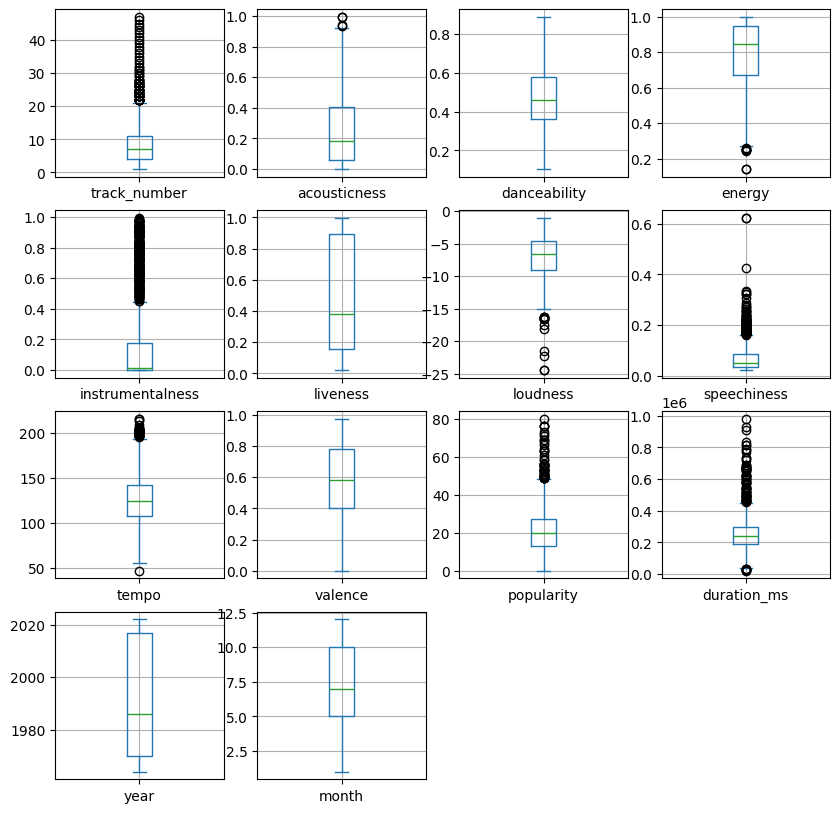

In [8]:
# Plot the data
# data.hist(figsize=(10, 10))
g = data.plot(kind='box', subplots=True, layout=(4, 4), figsize=(10, 10), grid=True)
plt.show()

In [9]:
def pairplots(pairs):
    g = sns.pairplot(data[pairs], hue='popularity')

    # Turn on grid for all subplots
    for ax in g.axes.flatten():
        if ax is not None:
            ax.grid(True)
    plt.show()

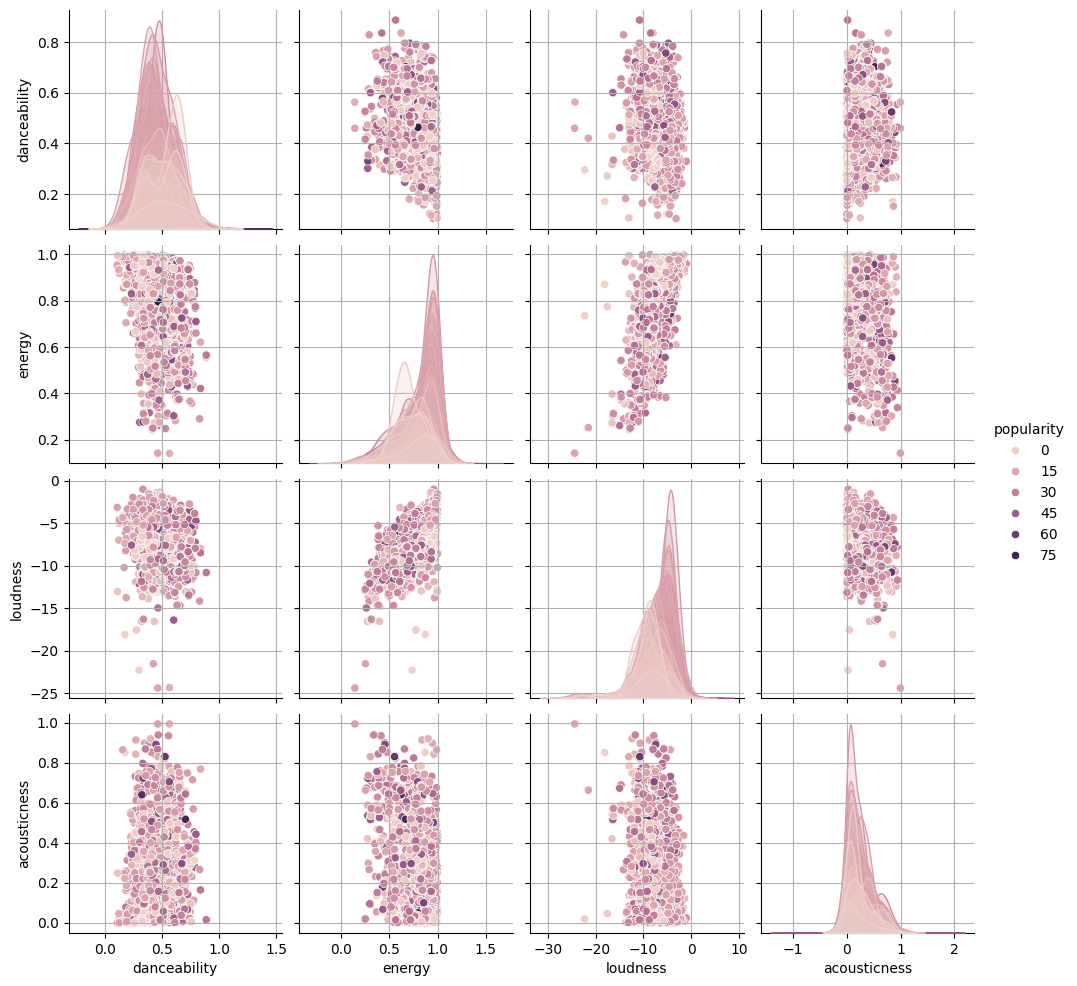

In [10]:
pairplots(['popularity', 'danceability', 'energy', 'loudness', 'acousticness'])

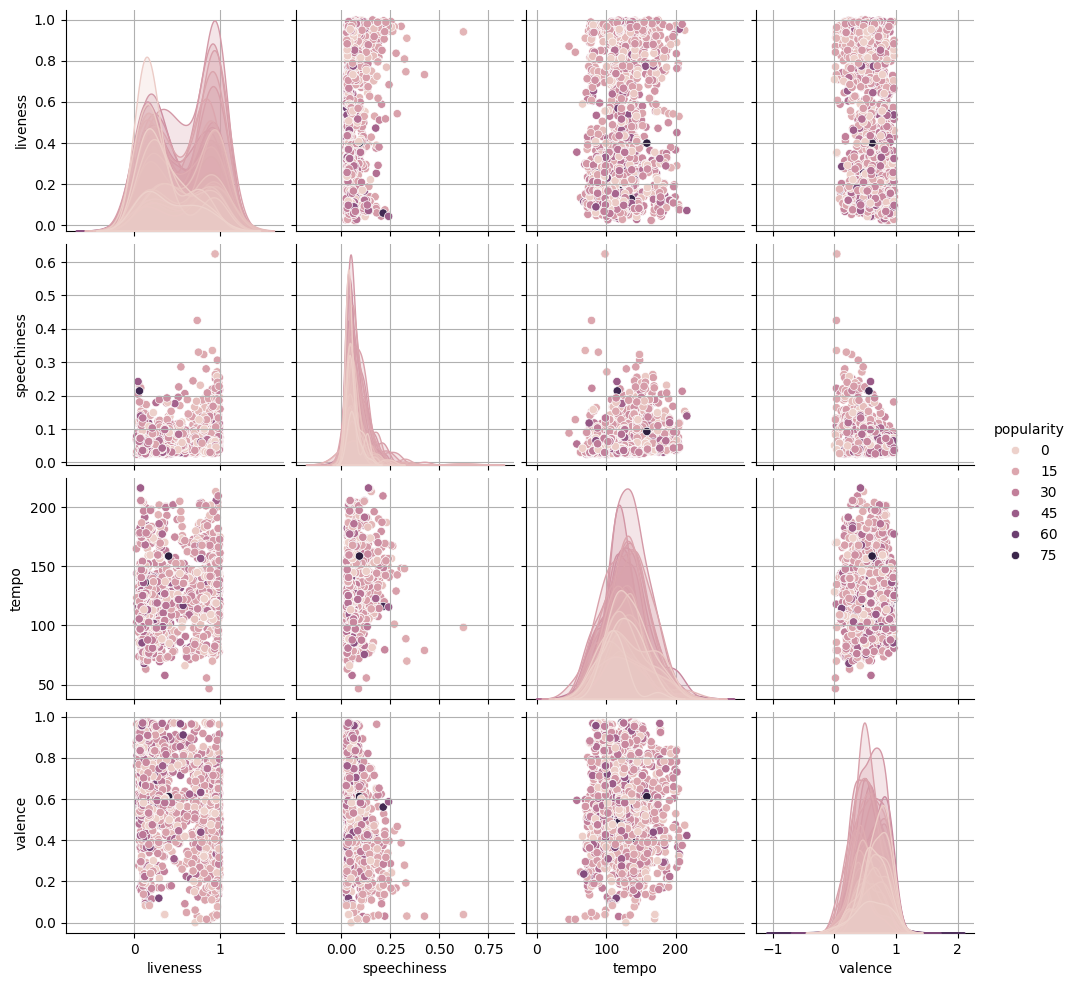

In [11]:
pairplots(['popularity', 'liveness', 'speechiness', 'tempo', 'valence'])

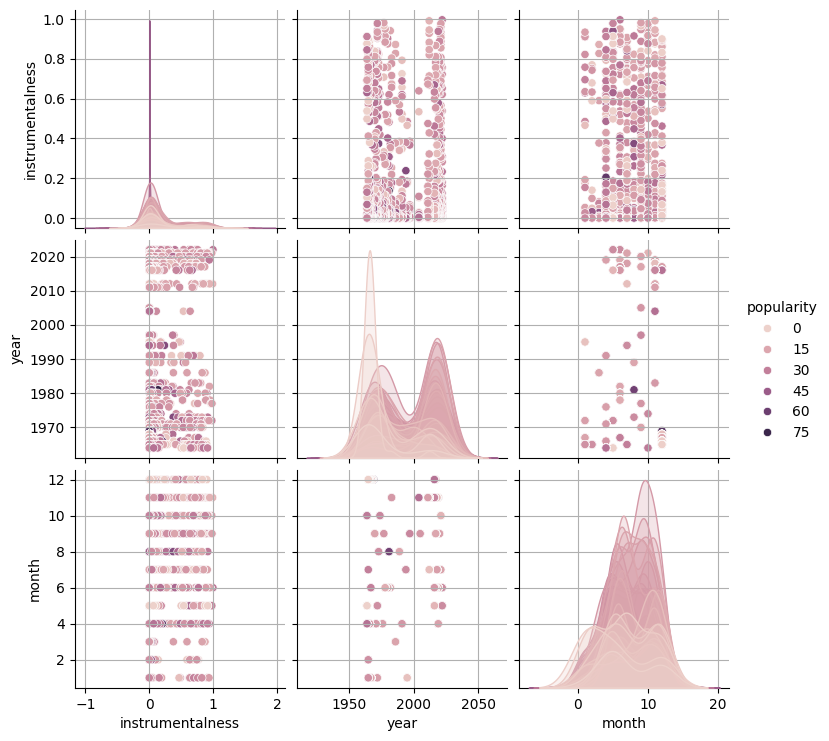

In [12]:
pairplots(['popularity', 'instrumentalness', "year", "month"])

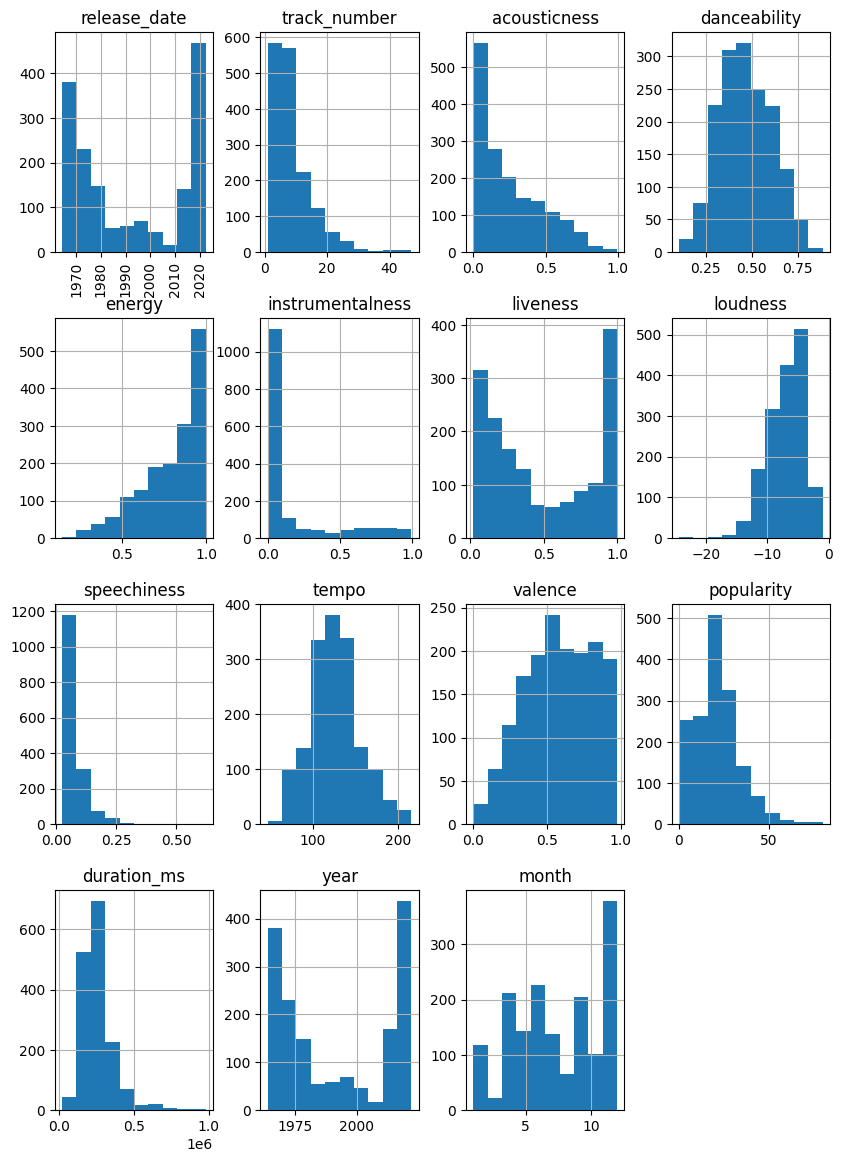

In [13]:
ax = data.hist(figsize=(10, 14))
ax[0,0].tick_params(axis='x', labelrotation=90)
plt.show()

__Observations:__ 

1. There no null values, and no big big-outliers. The `track_number, instrumentalness, loudness, speechiness, popularity and duration_ms` have values outside the IQR range. See outlier analysis as below.
2. The features `'instrumentalness', 'speechiness', 'duration' and 'loudness'` are skewed.
2. The `'month'` is cyclical feature.
3. The features `'track_number', 'acousticness', 'danceability', ‘energy', 'liveness', 'tempo', 'valence', 'popularity'` are 
4. The most releases are in 1970s and 2020s.

In [14]:
# Use KNN to show outliers
from sklearn.neighbors import LocalOutlierFactor
outliers = {}
counts = {}
for i in range(len(data.columns)):
    if np.isin(data.dtypes.iloc[i], ['object', 'datetime64[ns]']):
        continue
    result = LocalOutlierFactor(n_neighbors=300, contamination=0.1).fit_predict(data[[data.columns[i]]])
    outliers[data.columns[i]] = result
    counts[data.columns[i]] = np.unique(result, return_counts=True)

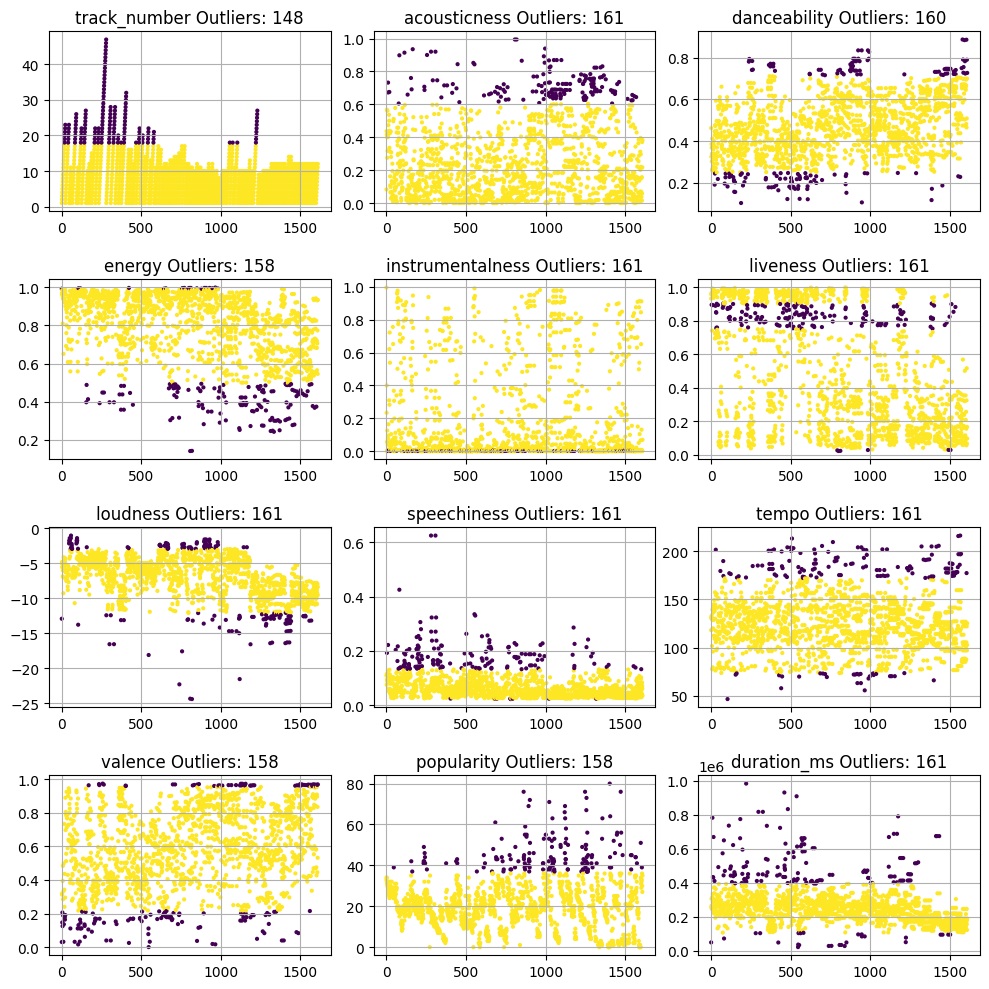

In [15]:
# Plot the outlier dictionary in 4x3 grid
outliers_keys = list(outliers.keys())
fig, axs = plt.subplots(4, 3, figsize=(10, 10))
for i, ax in enumerate(axs.flatten()):
    if i >= len(outliers_keys):
        ax.axis('off')
    else:
        ax.scatter(data.index, data[outliers_keys[i]],
                   c=outliers[outliers_keys[i]],
                   cmap='viridis',
                   s=4)
        # number of outliers
        outliers_count = len(outliers[outliers_keys[i]][outliers[outliers_keys[i]] == -1])
        ax.set_title(f'{outliers_keys[i]} Outliers: {outliers_count}')
        ax.grid(True)
plt.tight_layout(h_pad=0.5, w_pad=0.5)
plt.show()

In [16]:
# The counts of outliers for each column
counts

{'track_number': (array([-1,  1]), array([ 148, 1462])),
 'acousticness': (array([-1,  1]), array([ 161, 1449])),
 'danceability': (array([-1,  1]), array([ 160, 1450])),
 'energy': (array([-1,  1]), array([ 158, 1452])),
 'instrumentalness': (array([-1,  1]), array([ 161, 1449])),
 'liveness': (array([-1,  1]), array([ 161, 1449])),
 'loudness': (array([-1,  1]), array([ 161, 1449])),
 'speechiness': (array([-1,  1]), array([ 161, 1449])),
 'tempo': (array([-1,  1]), array([ 161, 1449])),
 'valence': (array([-1,  1]), array([ 158, 1452])),
 'popularity': (array([-1,  1]), array([ 158, 1452])),
 'duration_ms': (array([-1,  1]), array([ 161, 1449])),
 'year': (array([-1,  1]), array([ 150, 1460])),
 'month': (array([-1,  1]), array([ 140, 1470]))}

In [17]:
data[numberic_columns].corr()

track_number  acousticness  danceability    energy  \
track_number          1.000000     -0.035675     -0.112004  0.096314   
acousticness         -0.035675      1.000000      0.070017 -0.363819   
danceability         -0.112004      0.070017      1.000000 -0.300536   
energy                0.096314     -0.363819     -0.300536  1.000000   
instrumentalness     -0.002772      0.061403     -0.031812  0.120261   
liveness              0.188351     -0.117739     -0.516387  0.511188   
loudness              0.100835     -0.237083     -0.249406  0.698039   
speechiness           0.040617     -0.021774     -0.322684  0.417214   
tempo                -0.023934     -0.171003     -0.324398  0.201885   
valence              -0.104567     -0.138803      0.546210  0.046217   
popularity           -0.145115      0.108046      0.141205 -0.057272   
duration_ms           0.156455      0.039128     -0.220045  0.148876   
year                  0.362922     -0.161193     -0.353826  0.404659   
month                 0.006179     -0.119688     -0.213414  0.109121   

                  instrumentalness  liveness  loudness  speechiness     tempo  \
track_number             -0.002772  0.188351  0.100835     0.040617 -0.023934   
acousticness              0.061403 -0.117739 -0.237083    -0.021774 -0.171003   
danceability             -0.031812 -0.516387 -0.249406    -0.322684 -0.324398   
energy                    0.120261  0.511188  0.698039     0.417214  0.201885   
instrumentalness          1.000000  0.008873  0.012524     0.009586  0.010961   
liveness                  0.008873  1.000000  0.327036     0.400018  0.108855   
loudness                  0.012524  0.327036  1.000000     0.189904  0.112837   
speechiness               0.009586  0.400018  0.189904     1.000000  0.192687   
tempo                     0.010961  0.108855  0.112837     0.192687  1.000000   
valence                   0.103480 -0.347451 -0.027571    -0.399751  0.000558   
popularity               -0.010612 -0.205845  0.156323    -0.136745 -0.061061   
duration_ms              -0.137599  0.304735  0.221558     0.114546  0.001465   
year                     -0.062964  0.518306  0.399270     0.306888  0.030876   
month                     0.025764  0.193062  0.042430     0.127833  0.036470   

                   valence  popularity  duration_ms      year     month  
track_number     -0.104567   -0.145115     0.156455  0.362922  0.006179  
acousticness     -0.138803    0.108046     0.039128 -0.161193 -0.119688  
danceability      0.546210    0.141205    -0.220045 -0.353826 -0.213414  
energy            0.046217   -0.057272     0.148876  0.404659  0.109121  
instrumentalness  0.103480   -0.010612    -0.137599 -0.062964  0.025764  
liveness         -0.347451   -0.205845     0.304735  0.518306  0.193062  
loudness         -0.027571    0.156323     0.221558  0.399270  0.042430  
speechiness      -0.399751   -0.136745     0.114546  0.306888  0.127833  
tempo             0.000558   -0.061061     0.001465  0.030876  0.036470  
valence           1.000000    0.065333    -0.244833 -0.300661 -0.133420  
popularity        0.065333    1.000000     0.074102 -0.081648 -0.055670  
duration_ms      -0.244833    0.074102     1.000000  0.300066  0.032087  
year             -0.300661   -0.081648     0.300066  1.000000  0.241743  
month            -0.133420   -0.055670     0.032087  0.241743  1.000000

## Data Observations

1. There are no missing values in the data
2. There are not duplicate rows. 
3. The correlation among numeric values is not too high.
   - Maximum correlation is between `energy` and `loudness` as `0.69`. 
   - `danceability` and `liveness` is `-0.516` (not strong enough)
4. The outliers are approxmately betwen 8% to 10%.
   - `track_numbers`: outliers are in early numbers (start or end of the album)
   - `acousticness`: CLuster of outliers at high > 0.8. 
   - `loudness`: found at low-loudness 
5. The distributions for data are:
   - `danceability, tempo, duration_ms, valence` are normal or near-normal.
   - `acousticness, instrumentalness, speechiness, track_number, popularity` are right skewed
   - `loudness` is left skewed.
6. Releases:
   - `Jan-Feb` are low release
   - `Mar-Jun` moderate number of release
   - `July-Oct` dips in releases
   - `Nov-Dec` largest increaes in the year

# Section 2: Data Refinement

__Question 2__: Refine the data for further processing based on your findings

1. There is no missing data so we do not need to data imputation.
2. Will leave  outliers  as is for now. Will see if they cluster properly.
3. Will apply standard scalaer to all the data for before clustering.

# Section 3: EDA (Exploratory Data Analysis) and Feature Engineering

__Question 3__: Perform exploratory data analysis and feature engineering:

 - __a.__ Utilize suitable visualizations to identify the two albums that should be recommended to anyone based on the number of popular songs in each album
 - __b.__ Conduct exploratory data analysis to delve into various features of songs, aiming to identify patterns

1. Look at the mean popularity of the albums
2. Year over year change of features

In [18]:
# Mean popularity of the albums
albums_mean_popularity = data.groupby('album')['popularity'].mean().sort_values(ascending=False)
albums_mean_popularity_df = pd.DataFrame(albums_mean_popularity, columns=['popularity'])
print(f"Number of albums: {len(albums_mean_popularity)}")
# TOp-10 popular albums
albums_mean_popularity_df.head(10)

Number of albums: 90


popularity
album                                                         
Sticky Fingers (Remastered)                          53.300000
Some Girls                                           48.100000
Tattoo You (2009 Re-Mastered)                        46.454545
Exile On Main Street (2010 Re-Mastered)              44.166667
Beggars Banquet (50th Anniversary Edition)           43.700000
Aftermath                                            43.090909
Goats Head Soup (Remastered 2009)                    40.300000
Out Of Our Heads                                     39.583333
Black And Blue (Remastered 2009)                     38.500000
Let It Bleed (50th Anniversary Edition / Remast...   38.333333

__Remark__: The two most popular albums are:
1. `Get Yer Ya Yas Out` and `Exile On Main Street (Bonus Track Version)` are most popular albums.

In [19]:
# Least popular albums
albums_mean_popularity_df.tail(10)

popularity
album                                                 
Get Yer Ya Yas Out                            5.600000
Exile On Main Street (Bonus Track Version)    5.310345
Between The Buttons (US track listing)        5.250000
12 x 5                                        5.000000
December's Children (and everybody's)         4.833333
On Air                                        3.722222
Now!                                          3.666667
Out Of Our Heads (UK Sequence)                2.583333
Got Live if you want it!                      0.666667
England's Newest Hit Makers                   0.583333

## Data Over Years

There is no data for these years: 1975, 1979, 1984, 1985, 1987, 1988, 1990, 1992, 1993, 1996, 1998-2003, 2006-2010, 2013-2015, 2023 onwards

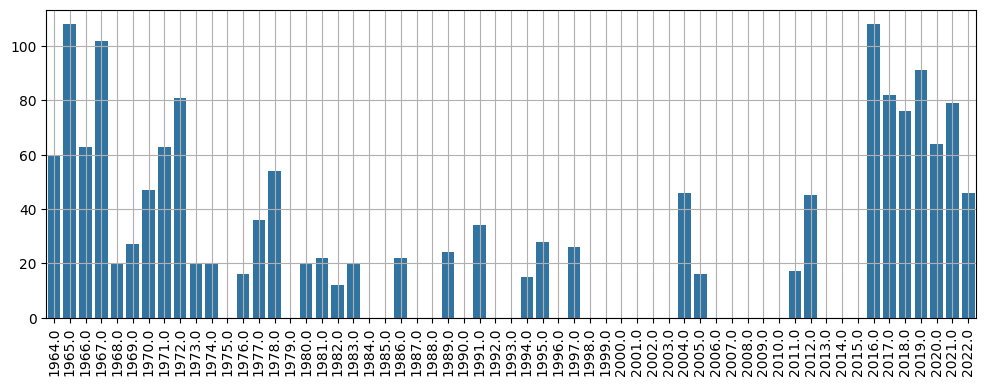

In [20]:
y_start, y_end = data["year"].min(), data["year"].max()
years = np.linspace(y_start, y_end, y_end - y_start + 1)
years_counts = np.zeros(y_end - y_start + 1)
albums_in_year = data.groupby('year').count()["album"]
type(albums_in_year), albums_in_year
for idx in range(len(albums_in_year)):
    years_counts[albums_in_year.index[idx] -
                 y_start] = albums_in_year.iloc[idx]
plt.figure(figsize=(12, 4))
sns.barplot(x=years, y=years_counts)
plt.xticks(rotation=90)
plt.grid(True)
plt.show()

## Long term view (Year over year)
This section analysis the numerical columns:
  - Numeric columns: ['track_number', 'acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo', 'valence', 'popularity', 'duration_ms']
  - Yearly changes in mean of numeric columns

In [21]:
# numberic_columns, yearly of numeric columns
yearly_numeric_columns = ['acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo', 'valence']
def attributes_by_period(period):
    # Plot the numeric columns by year
    fig, axs = plt.subplots(3, 3, figsize=(15, 10))
    ax = axs.flatten()
    for i, column in enumerate(yearly_numeric_columns):
        # Polynomial regression (degree 3)
        subset = data[[period, column]]
        x = subset[period].values
        y = subset[column].values
        colors = ["red", "green", "purple"]

        for j, deg in enumerate([1, 2, 3]):
            coeffs = np.polyfit(x, y, deg=deg)
            poly_eq = np.poly1d(coeffs)

            # Avoid duplicate x-values for smooth curve
            x_sorted = np.sort(np.unique(x))
            y_fit = poly_eq(x_sorted)

            sns.lineplot(x=x_sorted, y=y_fit,
                        ax=ax[i], color=colors[j],
                        linestyle='--', label=f"Poly {deg}")
        # Original values
        sns.lineplot(x=period, y=column, data=data,
                    ax=ax[i], color='blue', marker='o', label='Mean')
        ax[i].set_title(f'{column} over the {period}s')
        ax[i].set_xlabel('Year')
        for tick in ax[i].get_xticklabels():
            tick.set_rotation(90)
        ax[i].grid(True)
    plt.tight_layout(h_pad=0.5, w_pad=0.5)
    plt.xticks(rotation=90)
    plt.show()

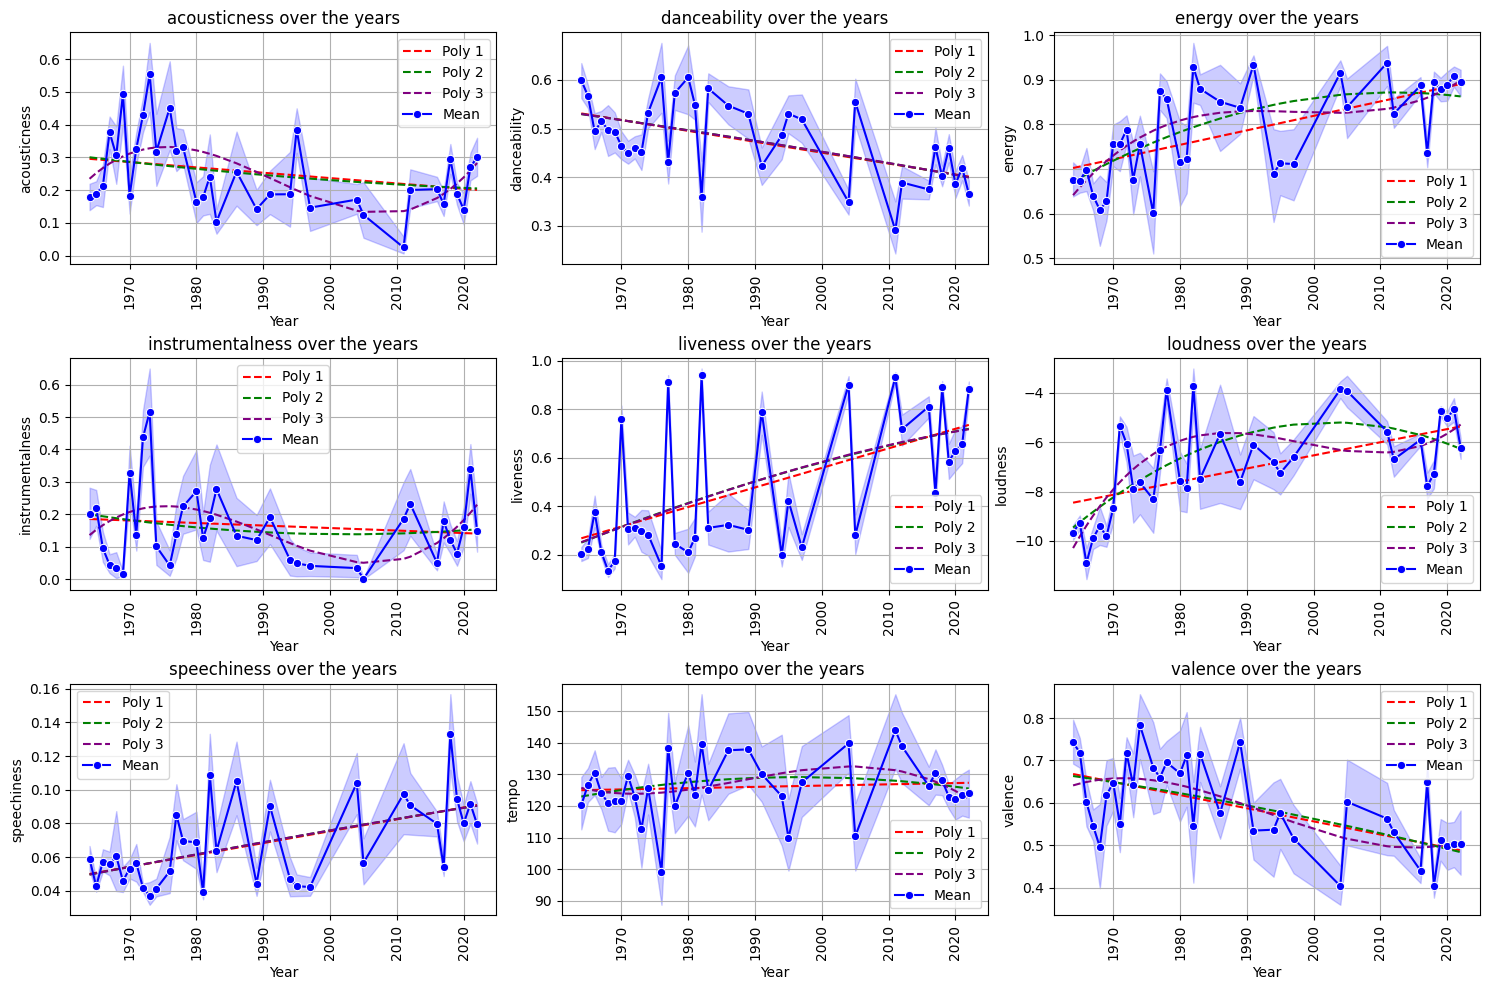

In [22]:
attributes_by_period("year")

The observed trend by `year` is:
1. `energy, loudness and liveness` have positive upward sloping trend.
2. `instrumentalness, tempo and valence` have decreasing trend
3. `acousticness and tempo` are fairly stable over the years

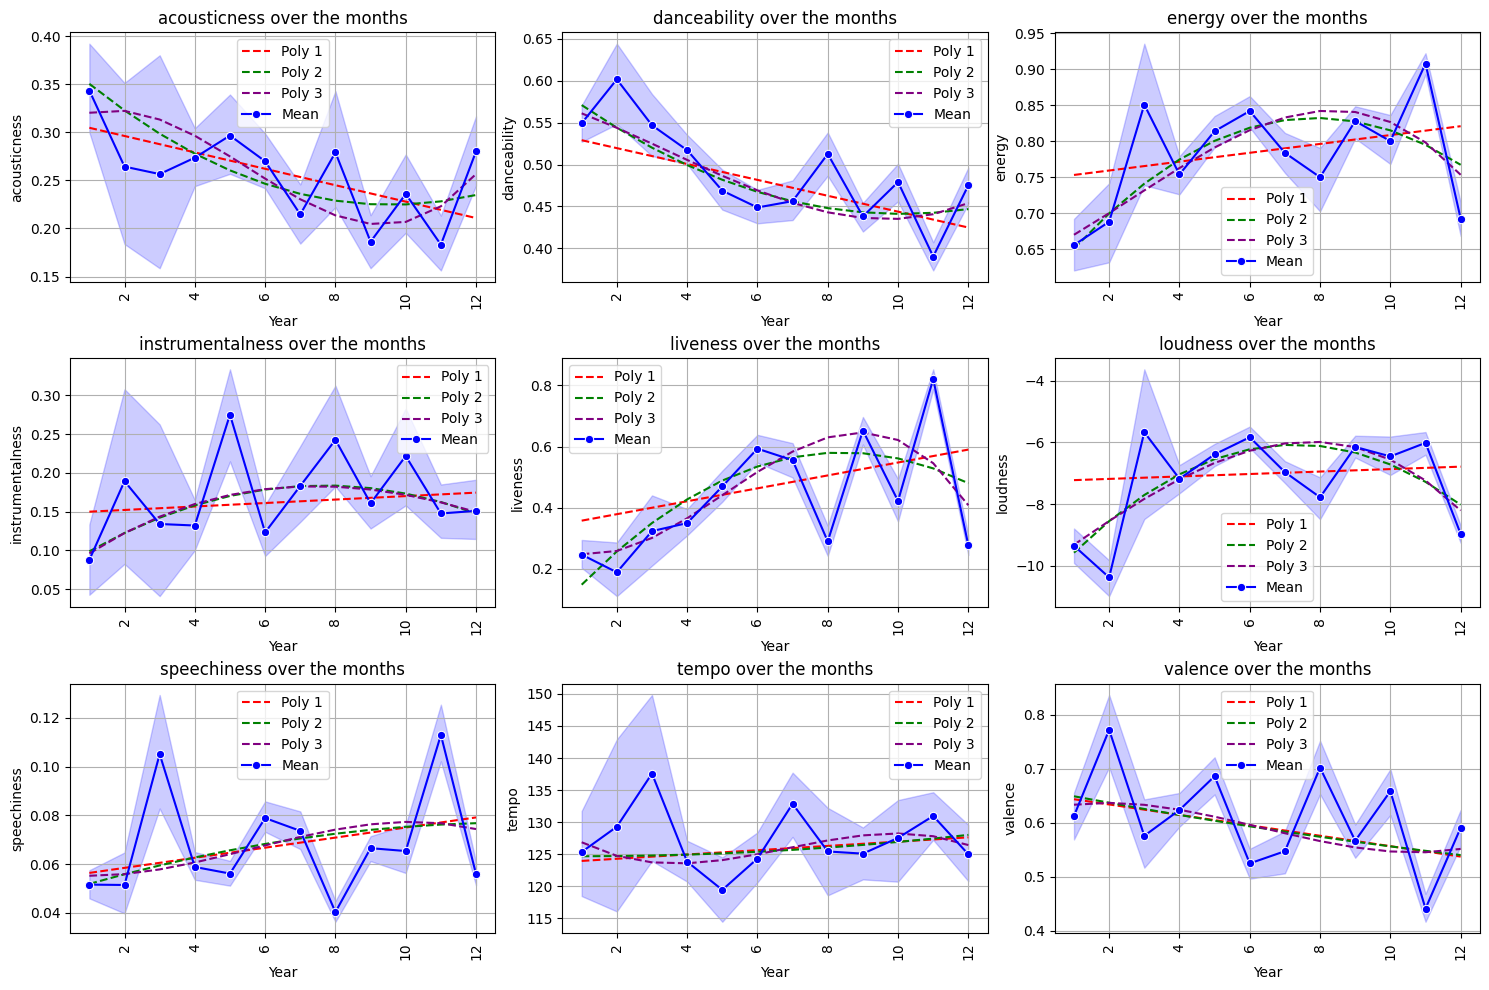

In [23]:
attributes_by_period("month")

## Seasonality (Monthly) View
1. `acousticness, danceability and valence` decling from Jan to Dec. Suggesting more acousti, dancing releases are  in the earlier months.
2. `energy, loudness` peaks around May-Aug 
3. `instrumentalness` more such tracks in summer
4. Seasonality:
   - Songs released in May-Aug are louder, faster and energetic
   - End of year the acousticness, danceability and valence drops
5. Second and Third degree shows clear curves meaning relationships are non-linear

In [24]:
# Create 5 year wide bins,
year_bins = np.arange(1960, 2025 + 5, 5)
bin_labels = [f"{start}-{start+4}" for start in year_bins[:-1]]
data['year_bin'] = pd.cut(data['year'], bins=year_bins,
                          labels=bin_labels, right=False)

## Looking at 5-year bins

This section plots the data over every five years and see if any trends emerges.

In [25]:
def yearly_bins_graphs(property, yrange=(0, 0.6)):
    # For bins from 1965 to now, plot the acousticness for each bin
    fig, axs = plt.subplots(4, 3, figsize=(12, 12))
    ax = axs.flatten()
    for i, year_bin in enumerate(bin_labels[1:]):
        sns.lineplot(x='year', y=property, data=data[data["year_bin"] == year_bin],
                    ax=ax[i], color='blue', marker='o', label='Mean')
        for tick in ax[i].get_xticklabels():
            tick.set_rotation(90)
        ax[i].grid(True)
        # set x axis label
        ax[i].set_title(f"{year_bin} bin")
        ax[i].set_xlim(year_bins[i+1], year_bins[i+1]+4)
        ax[i].set_ylim(yrange[0], yrange[1])
    plt.tight_layout(h_pad=0.5, w_pad=0.5)
    plt.show()

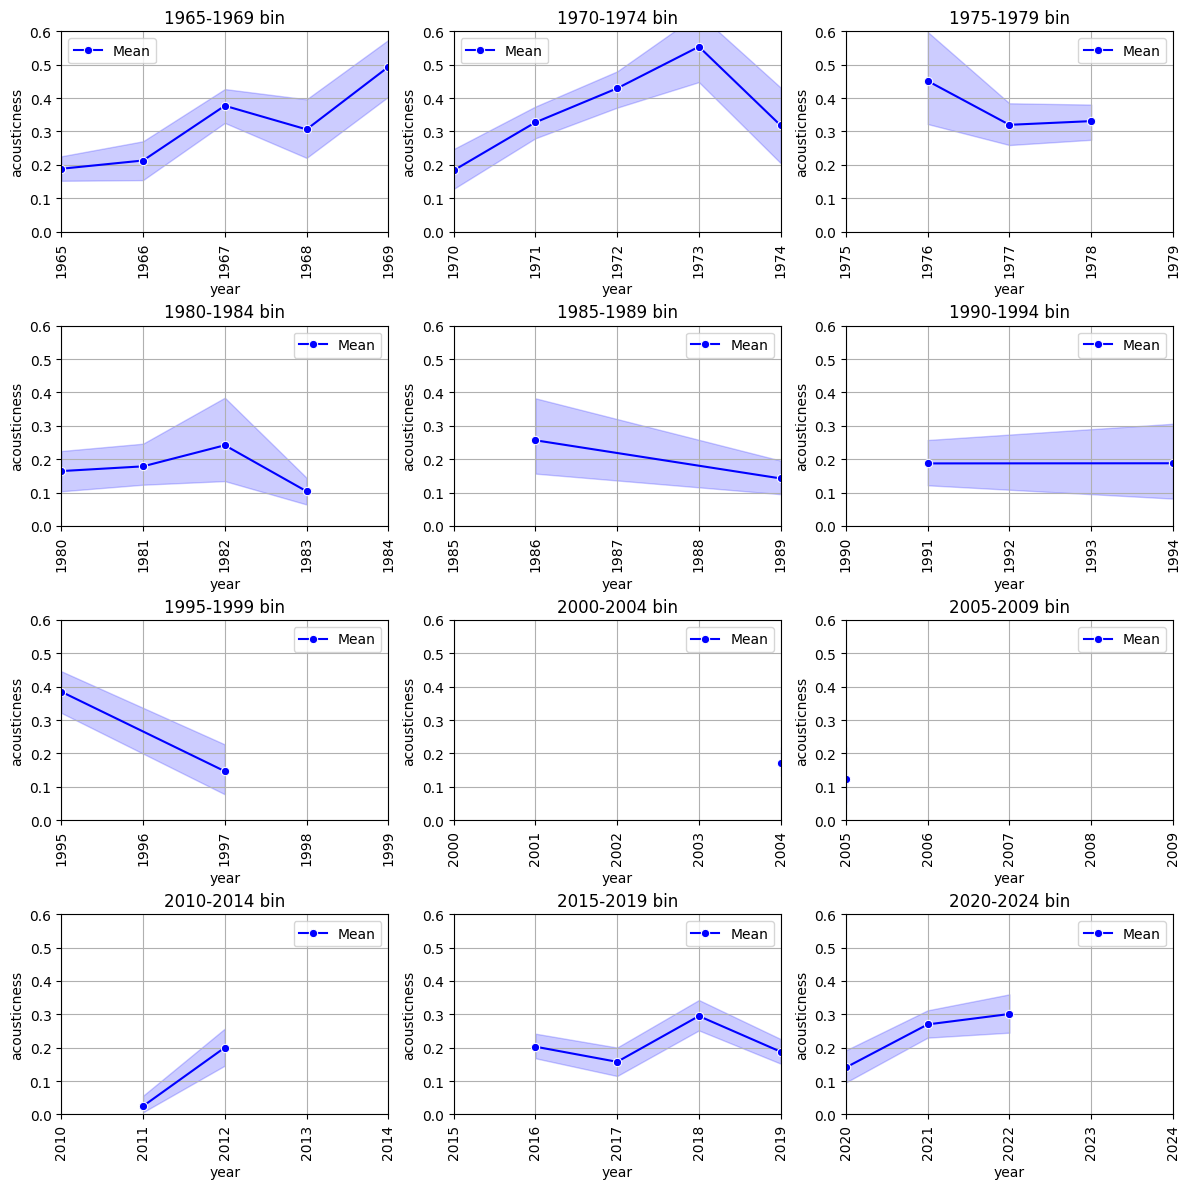

In [26]:
yearly_bins_graphs('acousticness')

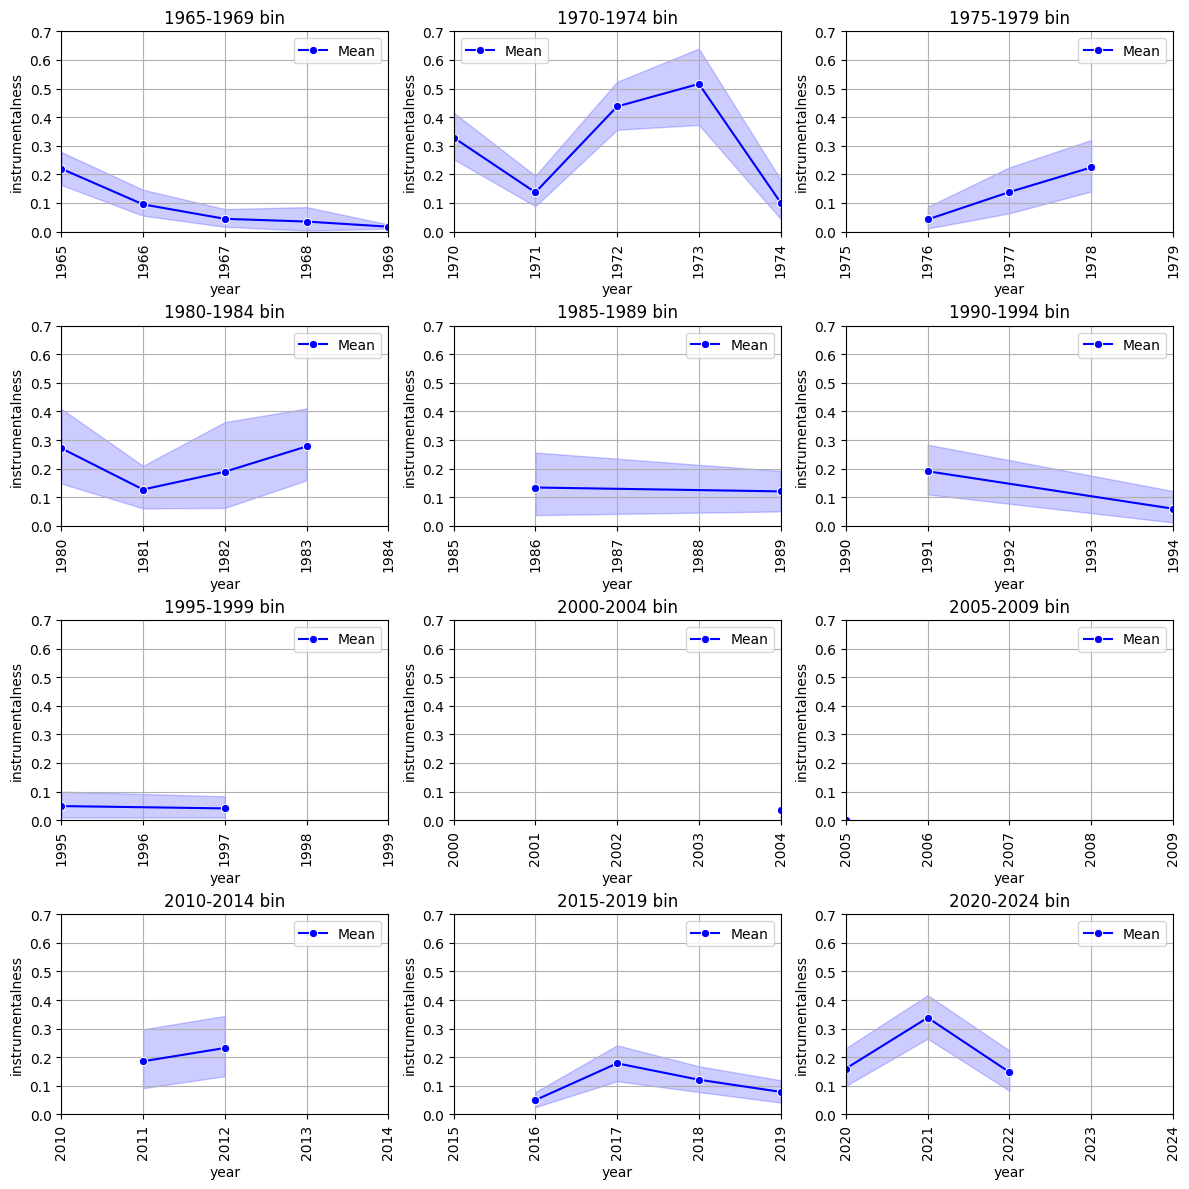

In [27]:
yearly_bins_graphs('instrumentalness', (0, 0.7))

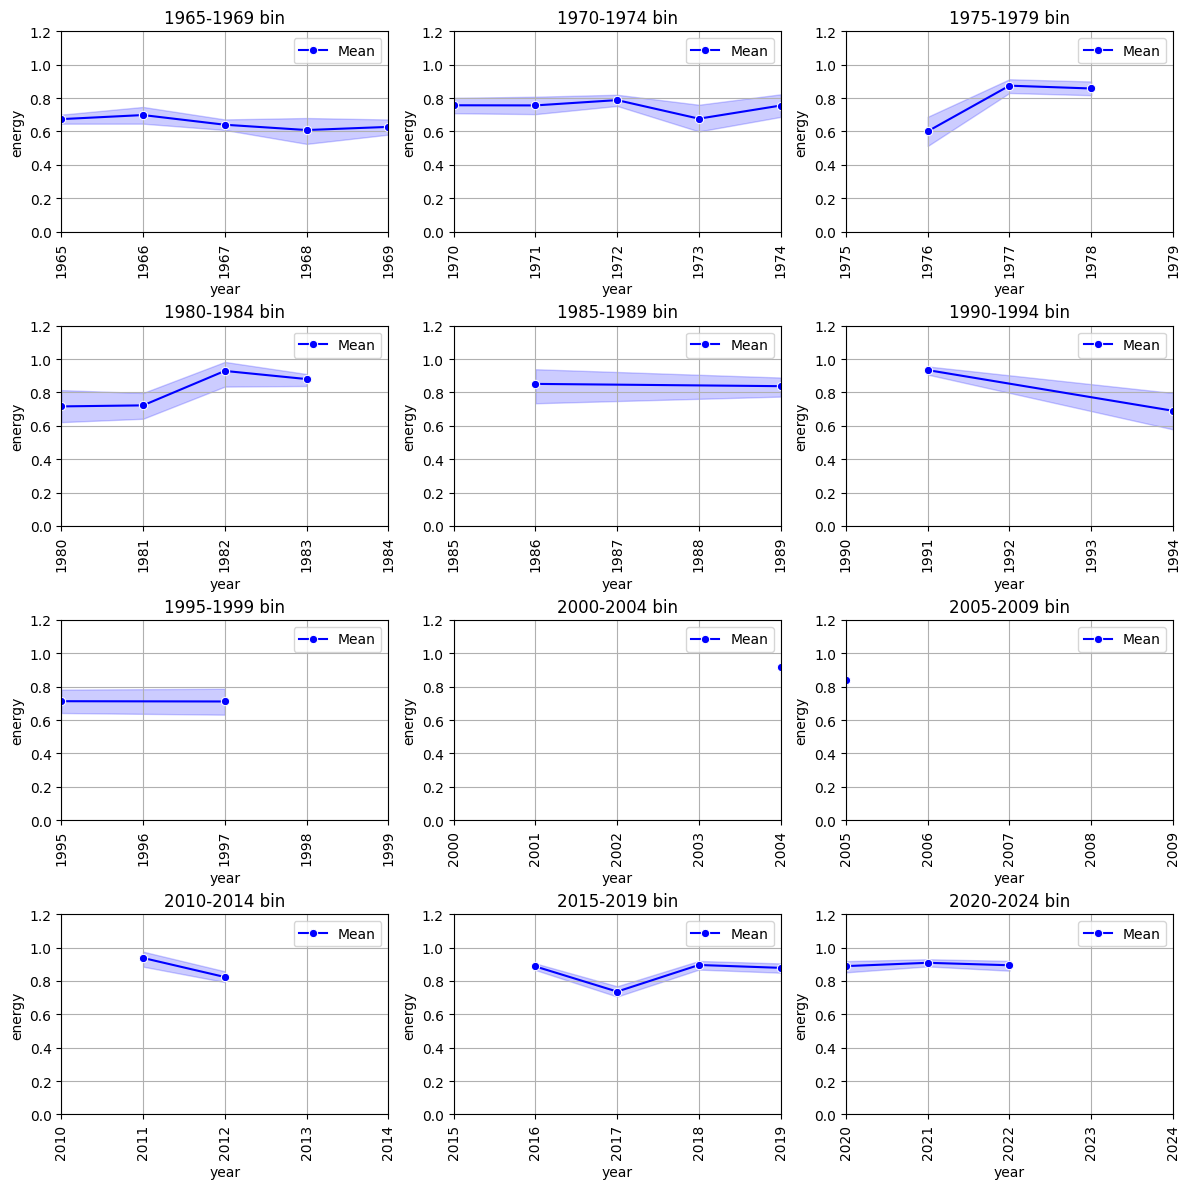

In [28]:
yearly_bins_graphs('energy', (0, 1.2))

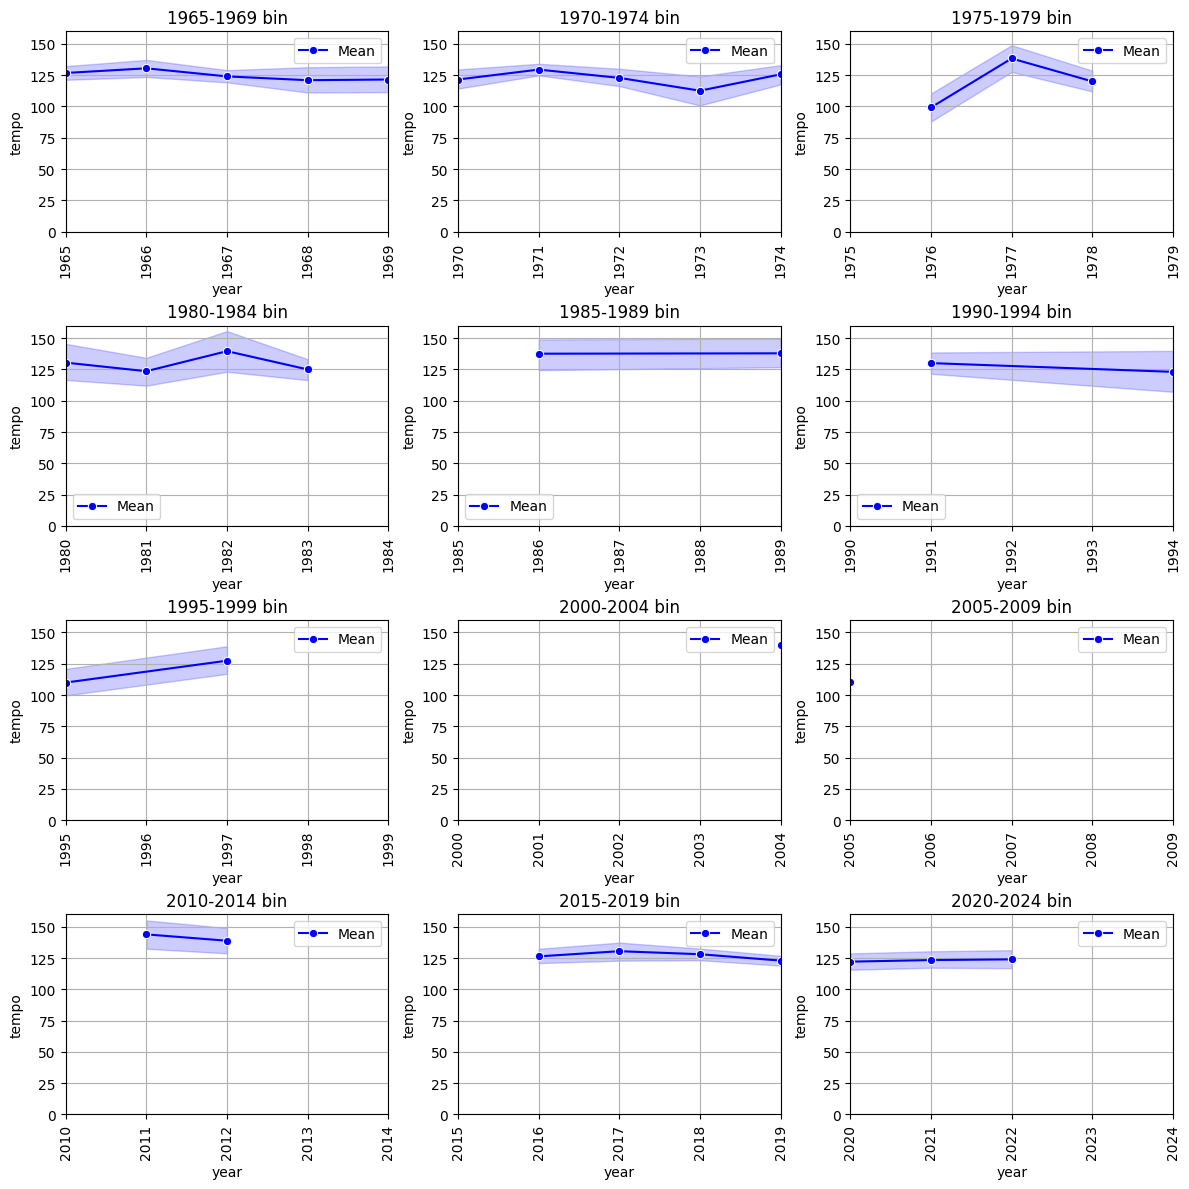

In [29]:
yearly_bins_graphs('tempo', (0, 160))

### Popularity

__Question 3:__ Perform exploratory data analysis and feature engineering
  - __c.__ Examine the relationship between a song's popularity and various factors, exploring how this correlation has evolved

__Remarks:__
Overall clustering patterns are weak. Some observations are (Code below):
1. Popular songs tend to:
    - avoid high acousticnes, liveliness, speechiness and instrumentaliness
    - have high energy, loudness
2. No clear trends are there

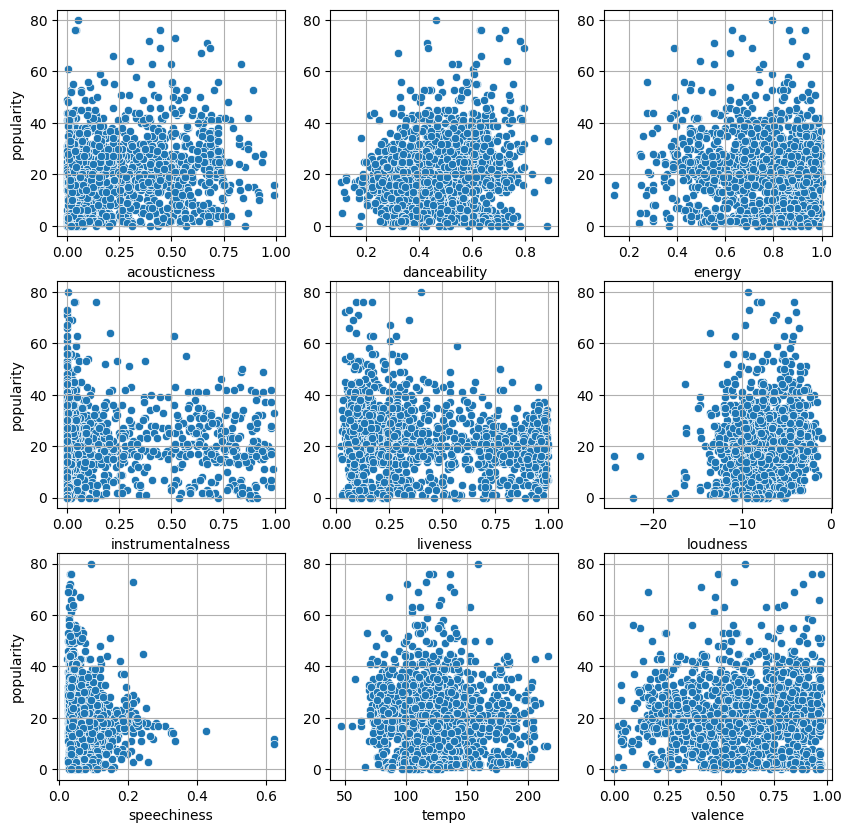

In [30]:
# Compare 'popularity' versus 'danceability'
fig, axs = plt.subplots(3, 3, figsize=(10, 10))
ax = axs.flatten()
for idx, property in enumerate(['acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo', 'valence']):
    sns.scatterplot(x=property, y='popularity', data=data, ax=ax[idx])
    ax[idx].grid(True)
    # skip y-label
    if idx % 3 != 0:
        ax[idx].set_ylabel('')
plt.show()

## Correlation among numerical features

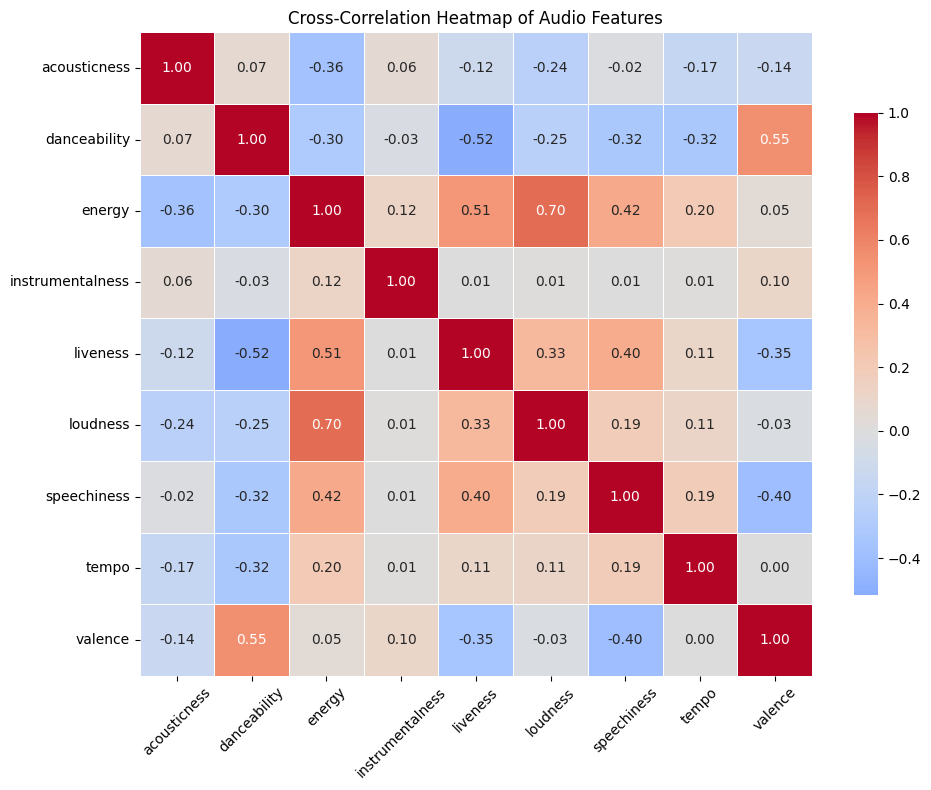

In [31]:
# Plot sns cross correlation heatmap]
# Select only numeric columns (if not done yet)
numeric_data = data[yearly_numeric_columns]

# Compute correlation matrix
corr_matrix = numeric_data.corr()

# Create heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm",
            center=0, linewidths=0.5, cbar_kws={"shrink": 0.75})
plt.title("Cross-Correlation Heatmap of Audio Features")
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

__Remarks__: Same as above
1. Good correlation in _energy_ and _loudness_
2. Moderate (~0.5) correlation in _danceability_ and _valence_. _enery_ and _liveness_. _danceability_ and _liveness_

## Dimensionality Reduction, PCA

__Question 3:__:
   - __d.__ Provide insights on the significance of dimensionality reduction
techniques. Share your ideas and elucidate your observations



#### Plan:

1. First transform each feature, this produces 118 features
    - Categorical features `'album', 'year_bin'` are one-hot-encoded. (90 albums + 12 bins)
    - Skewed fetaures `'instrumentalness','speechiness', 'duration_ms'` are log-transformed
    - `'loudness'` if shifted (so min -24.408 is at > zero) and then log-transformed.
    - `'month'` is converted to cyclic (sine, cos) scale, produces 2 features
    - Rest standard scaling is applied
2. Do PCA analysis for 99% variance 


In [32]:
def encode_month_cyclical(df):
    """Encoding in a circle, as Jan, Dec are closer than 1 and 12th month
    """
    radians = 2 * np.pi * df / 12
    return np.c_[np.sin(radians), np.cos(radians)]

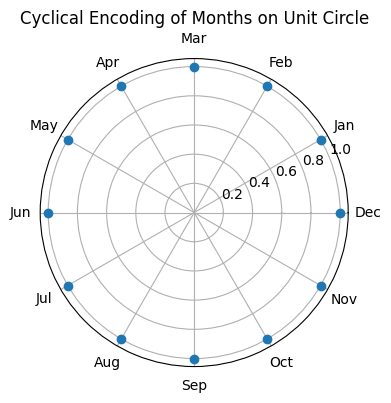

In [33]:
# Testing encode_month_cyclical
months = np.arange(1, 13)
months_enc = encode_month_cyclical(months)
angles = 2 * np.pi * months / 12
fig = plt.figure(figsize=(4, 4))
ax = plt.subplot(111, polar=True)
ax.plot(angles, np.ones_like(angles), 'o', label='Encoded Months')
ax.set_xticks(angles)
ax.set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
                    'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
ax.set_title("Cyclical Encoding of Months on Unit Circle")
plt.show()

In [34]:
standard_features = ['track_number', 'acousticness', 'danceability', 'energy',
                     'liveness', 'tempo', 'valence', 'popularity']
skewed_features = ['instrumentalness','speechiness', 'duration_ms']
cyclical_features = ['month']
categorical_features = ['album', 'year_bin']
numeric_trend_features = ['year']

In [35]:
data_copy = data[["album", "track_number",
                  "acousticness", "danceability", "energy", "instrumentalness",
                  "liveness", "loudness", "speechiness", "tempo", "valence",
                  "popularity", "duration_ms", "year", "year_bin", "month"]].copy()

In [36]:
# Print min/max for skewed features
for feature in ['instrumentalness','speechiness', 'duration_ms', 'loudness']:
    min_feature = data_copy[feature].min()
    max_feature = data_copy[feature].max()
    print(f"{feature}: ({min_feature}, {max_feature})")

instrumentalness: (0.0, 0.996)
speechiness: (0.0232, 0.624)
duration_ms: (21000, 981866)
loudness: (-24.408, -1.014)


In [37]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, FunctionTransformer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


cyclical_transformer = FunctionTransformer(encode_month_cyclical, validate=False)

# Log + Scale for skewed features
log_transformer = Pipeline([
    ('log', FunctionTransformer(np.log1p, validate=False)),
    ('scale', StandardScaler())
])
loudness_pipeline = Pipeline([
    ('shift_log', FunctionTransformer(lambda x: np.log1p(x + 25), validate=False)),
    ('scale', StandardScaler())
])

# 90 albums + 13 yearly bins = 103 categorical features
cat_pipeline = Pipeline([
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])
# Total features = 103 + 14 = 117
preprocessor = ColumnTransformer(transformers=[
    ('num', StandardScaler(), standard_features),
    ('skewed', log_transformer, skewed_features),
    ('loudness', loudness_pipeline, ['loudness']),
    ('cyclical', cyclical_transformer, ['month']),
    ('cat', cat_pipeline, categorical_features),
    ('year', StandardScaler(), numeric_trend_features)
])

In [38]:
def get_feature_names_from_preprocessor(preprocessor):
    """
    Extracts feature names from a fitted sklearn ColumnTransformer.
    Works with nested pipelines like scalers, OneHotEncoder, FunctionTransformer.
    """
    feature_names = []

    for name, transformer, columns in preprocessor.transformers_:
        if transformer == 'drop' or name == 'remainder':
            continue

        # Handle pipelines (e.g., scaler -> log -> transformer)
        if hasattr(transformer, 'named_steps'):
            last_step = list(transformer.named_steps.values())[-1]

            if hasattr(last_step, 'get_feature_names_out'):
                # Get base names for transformers that expand columns (e.g., OneHot)
                if isinstance(columns, (list, np.ndarray)):
                    input_features = columns
                else:
                    input_features = [columns]

                names = last_step.get_feature_names_out(input_features)
                feature_names.extend(names)
            else:
                feature_names.extend(columns)

        elif isinstance(transformer, FunctionTransformer) and name == "cyclical":
            # Manually name the cyclical features
            base = columns[0] if isinstance(columns, list) else columns
            feature_names.extend([f"{base}_sin", f"{base}_cos"])

        # FunctionTransformer or direct transformers
        elif hasattr(transformer, 'get_feature_names_out'):
            names = transformer.get_feature_names_out(columns)
            feature_names.extend(names)

        # Fallback to raw column names
        else:
            if isinstance(columns, (list, np.ndarray)):
                feature_names.extend(columns)
            else:
                feature_names.append(columns)

    return list(feature_names)

### Intermediate Features

There are 118 intermediate features:
1. 90 albums (90 OHE features)
2. 13 5-yearly bins
3. 2 monthly (sin/cos) features
4. 13 numerical feature

In [39]:
X_processed = preprocessor.fit_transform(data_copy)
# Sparse matrix
if hasattr(X_processed, "toarray"):
    X_processed = X_processed.toarray()

In [40]:
from sklearn.decomposition import PCA
pca = PCA(random_state=1024)
X_pca = pca.fit_transform(X_processed)

In [41]:
cummulative_variance = np.cumsum(pca.explained_variance_ratio_)
for variance in [0.5, 0.6, 0.7, 0.8, 0.9, 0.95, 0.99]:
    n_components = np.argmax(cummulative_variance >= variance) + 1
    print(f"Threshold variance = {variance*100}%, pca_components= {n_components}")

Threshold variance = 50.0%, pca_components= 4
Threshold variance = 60.0%, pca_components= 6
Threshold variance = 70.0%, pca_components= 8
Threshold variance = 80.0%, pca_components= 11
Threshold variance = 90.0%, pca_components= 15
Threshold variance = 95.0%, pca_components= 25
Threshold variance = 99.0%, pca_components= 75


In [42]:
# Print top 5 features in first 10 components
feature_names = get_feature_names_from_preprocessor(preprocessor)
feature_names_set = set()
for i, comp in enumerate(pca.components_[:10]):  # Top 3 components
    print(f"\nPCA Component {i+1:2d}:", end=" ")
    top_features = sorted(zip(feature_names, comp),
                          key=lambda x: abs(x[1]), reverse=True)[:5]
    for f, w in top_features:
        print(f"{f:16s}({w:.2f}), ", end="")
        feature_names_set.add(f)
print("\nTop 5 features: in top 10 components:\n", feature_names_set)


PCA Component  1: liveness        (0.41), year            (0.39), energy          (0.37), danceability    (-0.35), speechiness     (0.31), 
PCA Component  2: valence         (0.54), loudness        (0.44), energy          (0.40), acousticness    (-0.39), danceability    (0.26), 
PCA Component  3: duration_ms     (0.51), popularity      (0.42), tempo           (-0.40), instrumentalness(-0.30), acousticness    (0.25), 
PCA Component  4: track_number    (0.60), popularity      (-0.48), tempo           (-0.30), year            (0.27), danceability    (0.23), 
PCA Component  5: instrumentalness(0.79), acousticness    (0.40), tempo           (-0.31), month_cos       (-0.14), duration_ms     (-0.13), 
PCA Component  6: tempo           (0.64), track_number    (0.49), speechiness     (-0.32), danceability    (-0.26), instrumentalness(0.19), 
PCA Component  7: speechiness     (0.58), acousticness    (0.39), danceability    (0.33), month_sin       (0.31), track_number    (0.26), 
PCA Component  

In [43]:
X_processed.shape, X_pca.shape

((1610, 118), (1610, 118))

__Observations:__
1. 25 of the PCA components explain 95% of co-variance.
2. 75 PCA components explain 99% of co-variance
3. The underlying top-5 features in top-10 PCA components are:
    - `'year', 'month_cos', 'valence', 'instrumentalness', 'track_number'`
    - `'month_sin', 'energy', 'speechiness', 'duration_ms', 'liveness'`
    - `'danceability', 'popularity', 'acousticness', 'tempo', 'loudness'`
4. The contribution of each of these to PCA are in output above

# Section 4: Cluster Analysis


__Question 4:__ 

    - a. Identify the right number of clusters

Analyzed the inertia and silhoute scores. Use the __X_pca__ features to find out optimal KMeans clusters.

In [44]:
inertias = []
silhouette_scores = []
k_values = range(2, 11)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=1024)
    labels = kmeans.fit_predict(X_pca)
    inertias.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X_pca, labels))

# Step 3: Collect results in a DataFrame
knee_results = pd.DataFrame({
    'k': list(k_values),
    'inertia': inertias,
    'silhouette_score': silhouette_scores
})

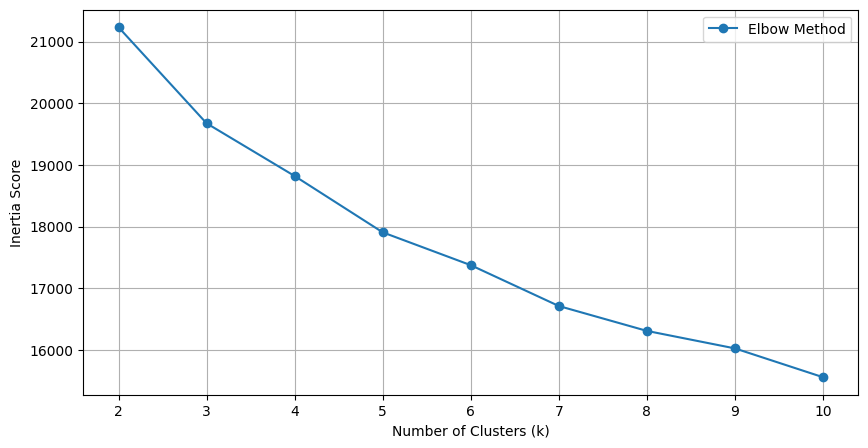

In [45]:
# Plot the inertia scores
plt.figure(figsize=(10, 5))
plt.plot(knee_results['k'], knee_results['inertia'], marker='o', label='Elbow Method')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia Score')
plt.legend()
plt.grid(True)
plt.show()

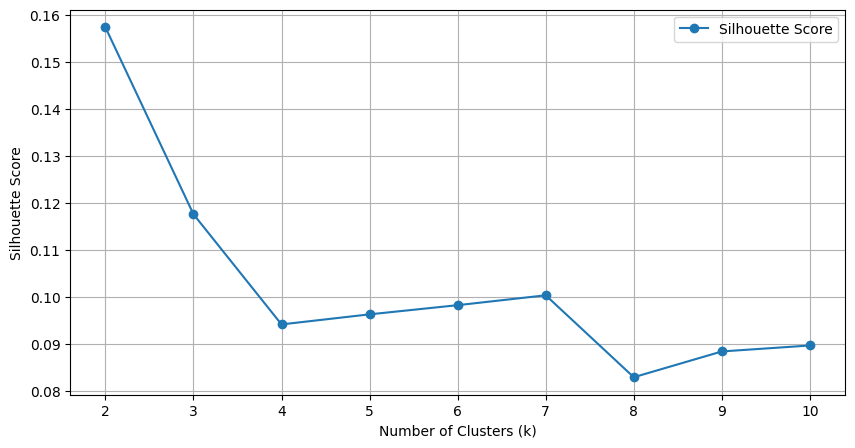

In [46]:
# Plot the silhouette scores
plt.figure(figsize=(10, 5))
plt.plot(knee_results['k'], knee_results['silhouette_score'], marker='o', label='Silhouette Score')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.legend()
plt.grid(True)
plt.show()

__Remark__:

The optimal number of clusters is N=7.

#### Creating clusters

__Question 4:__

- b. Use appropriate clustering algorithms

Use the first 25 PCA components (95% variance explanation) to create 7 clusters. We use KMeans to 

In [47]:
cluster = KMeans(n_clusters=7, random_state=1024)

cluster.fit(X_pca[:, :25])

KMeans(n_clusters=7, random_state=1024)

In [48]:
data_copy['cluster'] = cluster.labels_

In [49]:
data_copy['cluster'].unique()

array([1, 3, 2, 0, 4, 6, 5], dtype=int32)

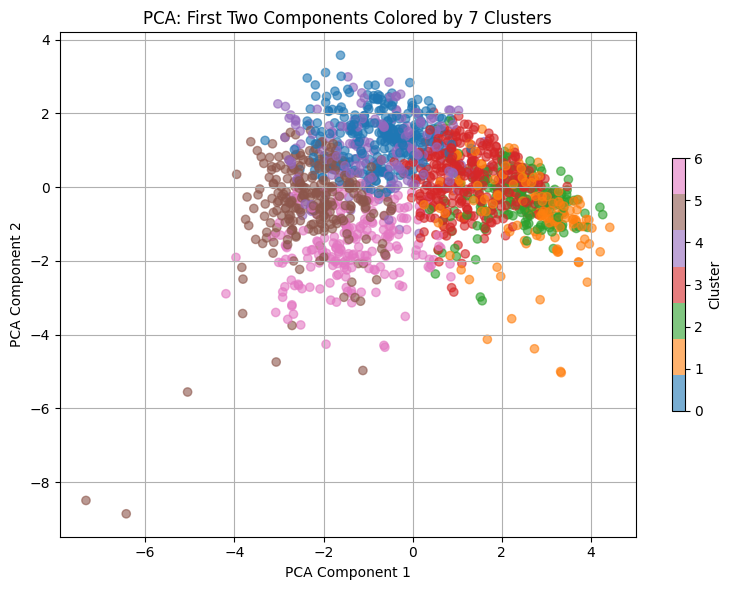

In [50]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
import numpy as np

# Blue, Orange, Green, Red, Purple, Brown, Pink
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2']
cmap_7 = ListedColormap(colors)

# Scatter plot with fixed 7-color map
plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1],
                      c=data_copy['cluster'], cmap=cmap_7, alpha=0.6)

plt.title("PCA: First Two Components Colored by 7 Clusters")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.colorbar(scatter, ticks=np.arange(7), label="Cluster", shrink=0.5)
plt.grid(True)
plt.tight_layout()
plt.show()

__Question 4:__

- c. Define each cluster based on the features

__Observations:__

On the first two PCA components:
1. The clusters are reasoneably well separated, but there is a overlap
2. Clusters 0 and 6 are overlapping
3. Clusters 1 and 2 are overlapping 
4. CLuster 5 and 6 are overlapping
5. Shapes are eliptical, preserving maximum variance

In [51]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, perplexity=30, init='pca',
    learning_rate='auto', max_iter=1000, random_state=1024
)
X_tsne = tsne.fit_transform(X_pca)

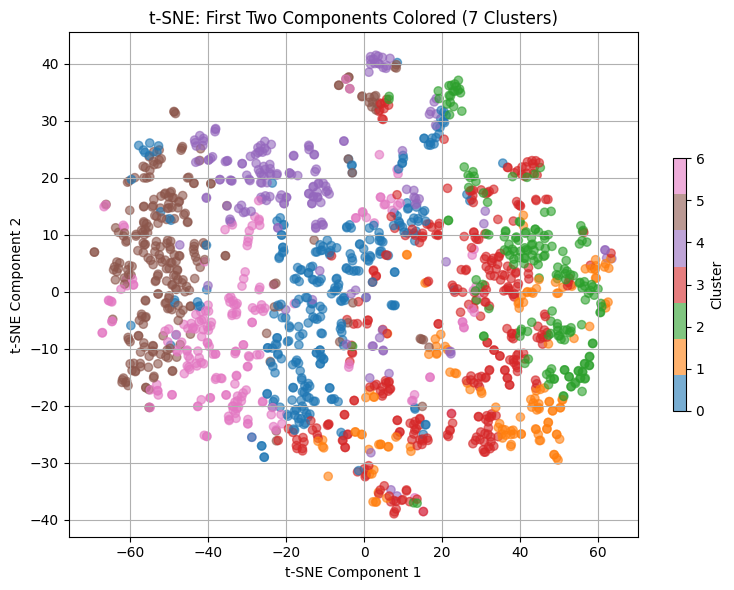

In [52]:
# PLot tsne
plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_tsne[:, 0], X_tsne[:, 1],
                      c=data_copy['cluster'], cmap=cmap_7, alpha=0.6)

plt.title("t-SNE: First Two Components Colored (7 Clusters)")
plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 2")
plt.colorbar(scatter, ticks=np.arange(7), label="Cluster", shrink=0.5)
plt.grid(True)
plt.tight_layout()
plt.show()

__Observations:__
1. tSNE is preserving local neighborhoods 
2. The clusters are well seprated.
2. Cluster 4 is in top center, 2 and six are tight neighborhoods